### Emerging Travel Agency Markets (Eurozone)



In [40]:
#imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


In [78]:
#Data
advisors = pd.read_csv('travel_advisors.csv', encoding='unicode_escape')
us_tourists_per_country = pd.read_csv('us_tourists_per_country.csv',  encoding='unicode_escape')
tourism_establishments_by_country = pd.read_csv('tourism_establishments_by_country.csv',  encoding='unicode_escape')

#Pivot Table
advisors_by_country = pd.pivot_table(advisors, values='Advisor', index='EU Country', aggfunc='count', sort=True)
advisors_and_tourists = pd.merge(advisors_by_country, us_tourists_per_country, on="EU Country")
all_merged_tables = pd.merge(advisors_and_tourists, tourism_establishments_by_country, on="EU Country" )


#### Fora Advisor Distribution

C:\Users\ncare\AppData\Local\Temp\ipykernel_21220\1321176935.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(advisor_distribution['EU Country'], rotation=45, ha='right')


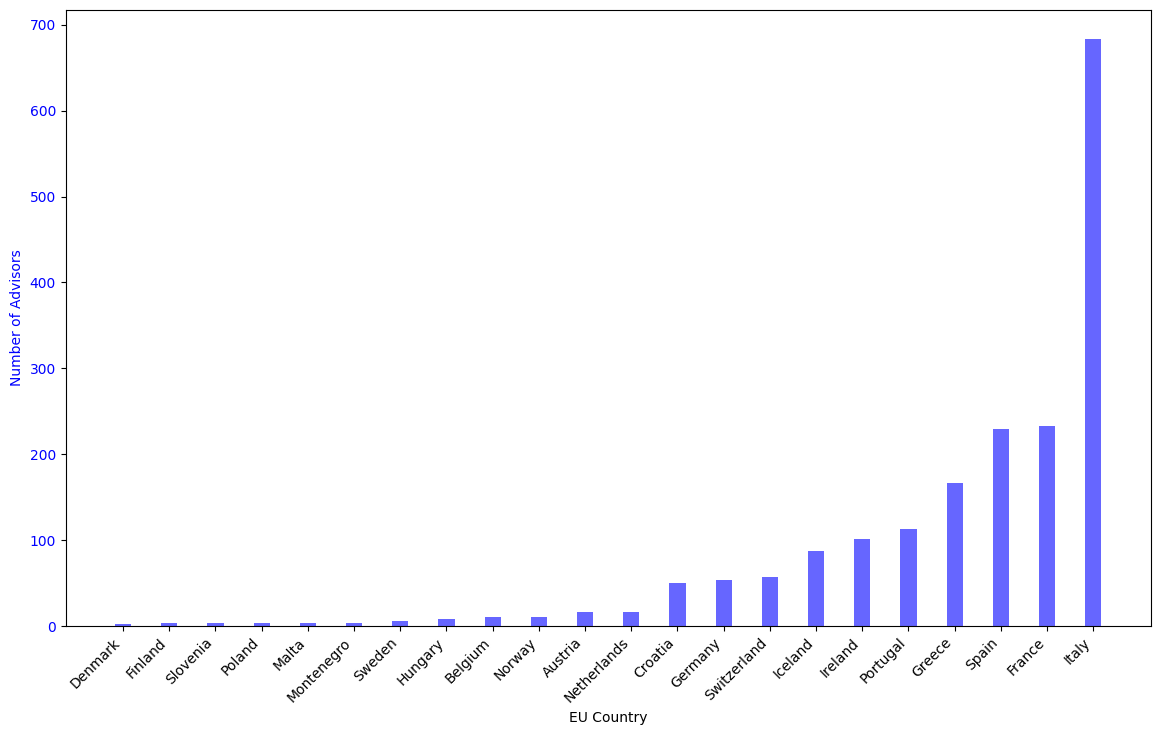

In [79]:
advisor_distribution = advisors_and_tourists.sort_values(by=['Advisor'])


fig, ax1 = plt.subplots(figsize=(14,8))

width = 0.35

ax1.bar(advisor_distribution['EU Country'], advisor_distribution['Advisor'], width, color='b', alpha=0.6, label='Number of Advisors', align='center')
ax1.set_xlabel('EU Country')
ax1.set_ylabel('Number of Advisors', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1.set_xticklabels(advisor_distribution['EU Country'], rotation=45, ha='right')

plt.show()

#### Advisors v. US Tourist Numbers
In this analysis, I compare the number of Fora Travel Advisors to annual US Tourists per EU country to identify gaps. Ideally, Fora Advisors should be proportional to the amount of US tourists visiting that specific country. For this analysis, I only focused on 2022 as the EU dataset did not have 2023 numbers yet. I also kept the tourist count to ONLY US tourists since Fora seems to target the American market.

My analysis identified the following countries as having a disproportional number of Fora Advisors to US visitors:
- Poland
- Sweden
- Denmark
- Netherlands

In [77]:

final_table = all_merged_tables[['EU Country', 'Advisor', '2022_x', 'Growth Rate_x','2022_y', 'Growth Rate_y']].copy()
final_table.columns = ['EU Country', 'Fora Advisors', 'US Tourists 2022', 'Tourist Growth Rate', 'Hotels 2022', 'Hotel Growth Rate']

final_table['US Tourists 2022'] = pd.to_numeric(final_table['US Tourists 2022'], errors='coerce')
final_table['Fora Advisors'] = pd.to_numeric(final_table['Fora Advisors'], errors='coerce')
final_table['Hotels 2022'] = pd.to_numeric(final_table['Hotels 2022'], errors='coerce')



final_table['Advisors/Tourists'] = final_table['US Tourists 2022'] / final_table['Fora Advisors']
final_table['Tourists/Hotels'] = final_table['US Tourists 2022'] / final_table['Hotels 2022']



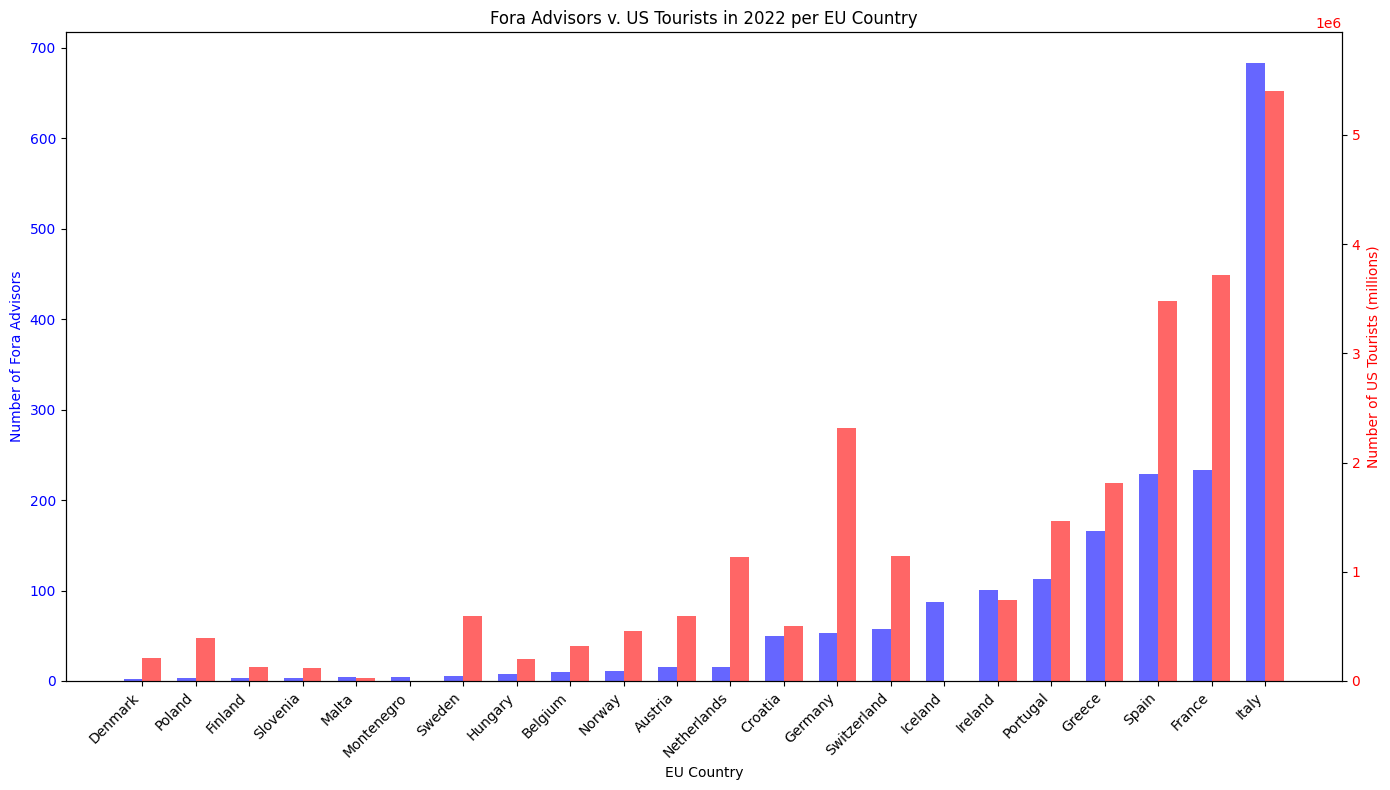

In [86]:
final_table['US Tourists 2022'] = pd.to_numeric(final_table['US Tourists 2022'], errors='coerce')
final_table = final_table.sort_values(by=['Fora Advisors'])

fig, ax1 = plt.subplots(figsize=(14,8))

width = 0.35
x = range(len(final_table['EU Country']))

ax1.bar(x, final_table['Fora Advisors'], width, color='b', alpha=0.6, label='Number of Advisors', align='center')
ax1.set_xlabel('EU Country')
ax1.set_ylabel('Number of Fora Advisors', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.bar([i+width for i in x], final_table['US Tourists 2022'], width, color='r', alpha=0.6, label='Number of US Tourists (2022)', align='center')
ax2.set_ylabel('Number of US Tourists (millions)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(0, final_table['US Tourists 2022'].max()*1.1)

ax1.set_xticks([i+width/2 for i in x])
ax1.set_xticklabels(final_table['EU Country'], rotation=45, ha='right')

plt.title('Fora Advisors v. US Tourists in 2022 per EU Country')
fig.tight_layout()
plt.show()

In [62]:
final_table.sort_values(by=['Advisors/Tourists', 'Tourist Growth Rate'])

,EU Country,Fora Advisors,US Tourists 2022,Tourist Growth Rate,Hotels 2022,Hotel Growth Rate,Advisors/Tourists,Tourists/Hotels
12,Malta,4,27494.0,-17.85,311.0,21.54,6873.500000,88.405145
10,Ireland,101,742507.0,4.82,NaN,NaN,7351.554455,NaN
11,Italy,683,5399785.0,-12.83,224644.0,2.81,7905.980966,24.037076
2,Croatia,50,502141.0,-24.65,110493.0,-2.96,10042.820000,4.544550
7,Greece,166,1814267.0,9.68,30221.0,-25.17,10929.319277,60.033321
17,Portugal,113,1461333.0,20.55,7667.0,6.14,12932.150442,190.600365
19,Spain,229,3476934.0,-5.97,56174.0,5.84,15183.117904,61.895788
5,France,233,3713994.0,-20.57,28834.0,-2.94,15939.888412,128.806062
21,Switzerland,57,1145448.0,-6.45,NaN,NaN,20095.578947,NaN
8,Hungary,8,201140.0,-84.23,4023.0,-10.46,25142.500000,49.997514
